In [1]:
#import important modules to load data
import numpy as np
import os
!pip3 install --upgrade tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPool2D, Activation
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
Data_Dir = 'C:\Work_Folder\DataScience\DeepLearning\PetRecognisation'
categories = ['cats','dogs']
train_path = Data_Dir + '\\train'
test_path = Data_Dir + '\\test'

In [4]:
train_batch = os.listdir(train_path)

In [5]:
train_batch

['cats', 'dogs']

Populating the interactive namespace from numpy and matplotlib


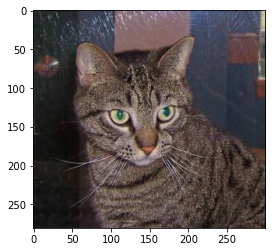

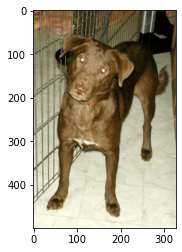

In [6]:
#X_train = []
#for i in train_batch:
   # img_path = os.path.join(train_path,i)
  #  x = image.load_img(img_path, grayscale=False)
 #   X_train = image.img_to_array(x)
#X_train = np.array(X_train)
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
for i in train_batch:
    img_path = os.path.join(train_path,i)
    img=mpimg.imread(img_path + '\\1.jpg')
    imgplot = plt.imshow(img)
    plt.show()


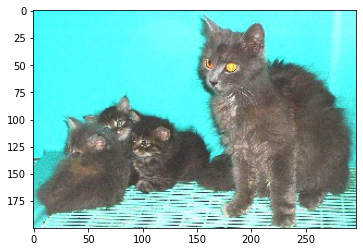

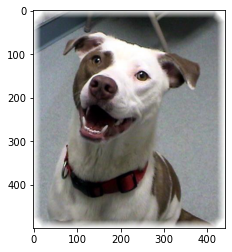

In [7]:
test_batch = os.listdir(test_path)
for i in test_batch:
    img_path = os.path.join(test_path,i)
    img=mpimg.imread(img_path + '\\101.jpg')
    imgplot = plt.imshow(img)
    plt.show()

In [8]:
train_data_gen = ImageDataGenerator(rescale=1.0/255.0, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_data_gen = ImageDataGenerator(rescale=1.0/255.0)

In [9]:
train_generator = train_data_gen.flow_from_directory(train_path, target_size=(150,150), batch_size=20, class_mode='binary', classes=train_batch)
test_generator = test_data_gen.flow_from_directory(test_path, target_size=(150,150), batch_size=20, class_mode='binary', classes=test_batch)

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


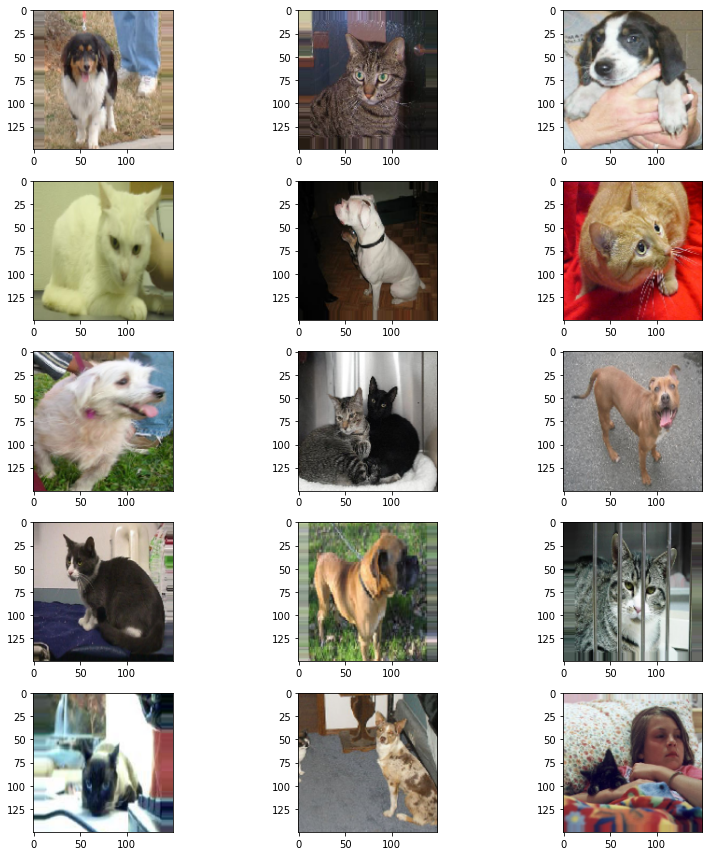

In [86]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [20]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first': 
    input_shape=(3, 150, 150)
else:
    input_shape=(150,150,3)

In [32]:
model = Sequential()
model.add(Conv2D(32,(5,5),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Activation('softmax')) 
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 146, 146, 32)      2432      
_________________________________________________________________
activation_20 (Activation)   (None, 146, 146, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 69, 69, 64)        51264     
_________________________________________________________________
activation_21 (Activation)   (None, 69, 69, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 34, 34, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 73984)            

In [33]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 146, 146, 32)      2432      
_________________________________________________________________
activation_20 (Activation)   (None, 146, 146, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 69, 69, 64)        51264     
_________________________________________________________________
activation_21 (Activation)   (None, 69, 69, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 34, 34, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 73984)            

In [34]:
training1 = model.fit_generator(train_generator, epochs=100, validation_data=test_generator)

Epoch 1/100
2/2 [==============================] - 1s 454ms/step - loss: 0.7036 - accuracy: 0.5250 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 1s 362ms/step - loss: 0.7062 - accuracy: 0.4250 - val_loss: 0.6976 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 1s 347ms/step - loss: 0.6928 - accuracy: 0.5500 - val_loss: 0.6976 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 1s 361ms/step - loss: 0.7025 - accuracy: 0.4750 - val_loss: 0.6974 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 1s 368ms/step - loss: 0.6767 - accuracy: 0.5750 - val_loss: 0.6974 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 1s 361ms/step - loss: 0.7044 - accuracy: 0.4500 - val_loss: 0.6974 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 1s 346ms/step - loss: 0.7065 - accuracy: 0.4500 - val_loss: 0.6973 - val_accuracy: 0.5000
Epoch 8/100
2

In [35]:
training2 = model.fit_generator(train_generator, epochs=200, validation_data=test_generator)

Epoch 1/200
2/2 [==============================] - 1s 462ms/step - loss: 0.6954 - accuracy: 0.5250 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 2/200
2/2 [==============================] - 1s 363ms/step - loss: 0.6977 - accuracy: 0.5000 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 3/200
2/2 [==============================] - 1s 462ms/step - loss: 0.6898 - accuracy: 0.5250 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 4/200
2/2 [==============================] - 1s 461ms/step - loss: 0.6812 - accuracy: 0.5500 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 5/200
2/2 [==============================] - 1s 472ms/step - loss: 0.6967 - accuracy: 0.5000 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 6/200
2/2 [==============================] - 1s 473ms/step - loss: 0.7096 - accuracy: 0.4500 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 7/200
2/2 [==============================] - 1s 442ms/step - loss: 0.6824 - accuracy: 0.5500 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 8/200
2

In [36]:
training3 = model.fit_generator(train_generator, epochs=300, validation_data=test_generator)

Epoch 1/300
2/2 [==============================] - 1s 390ms/step - loss: 0.6952 - accuracy: 0.5250 - val_loss: 0.6958 - val_accuracy: 0.5000
Epoch 2/300
2/2 [==============================] - 1s 371ms/step - loss: 0.6967 - accuracy: 0.4750 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 3/300
2/2 [==============================] - 1s 363ms/step - loss: 0.6910 - accuracy: 0.5500 - val_loss: 0.6956 - val_accuracy: 0.5000
Epoch 4/300
2/2 [==============================] - 1s 341ms/step - loss: 0.6947 - accuracy: 0.5250 - val_loss: 0.6956 - val_accuracy: 0.5000
Epoch 5/300
2/2 [==============================] - 1s 369ms/step - loss: 0.6959 - accuracy: 0.5250 - val_loss: 0.6955 - val_accuracy: 0.5000
Epoch 6/300
2/2 [==============================] - 1s 362ms/step - loss: 0.6970 - accuracy: 0.5000 - val_loss: 0.6955 - val_accuracy: 0.5000
Epoch 7/300
2/2 [==============================] - 1s 377ms/step - loss: 0.6878 - accuracy: 0.5500 - val_loss: 0.6955 - val_accuracy: 0.5000
Epoch 8/300
2

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


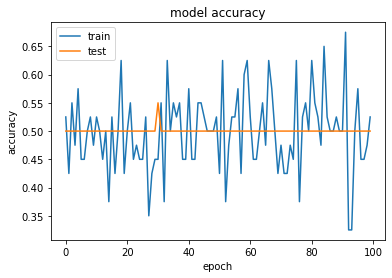

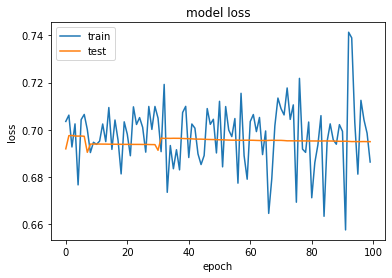

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training1.history.keys())
# summarize training for accuracy
plt.plot(training1.history['accuracy'])
plt.plot(training1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training1.history['loss'])
plt.plot(training1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


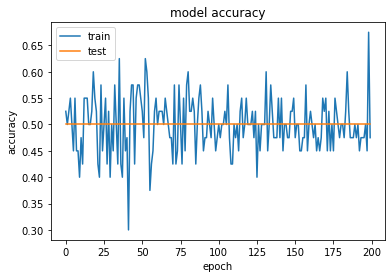

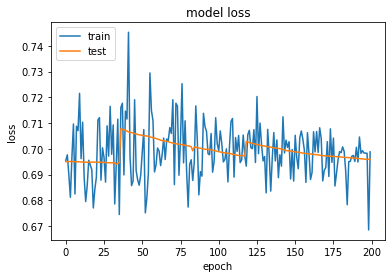

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training2.history.keys())
# summarize training for accuracy
plt.plot(training2.history['accuracy'])
plt.plot(training2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training2.history['loss'])
plt.plot(training2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


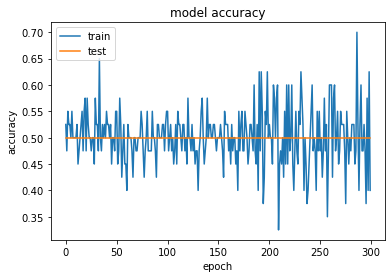

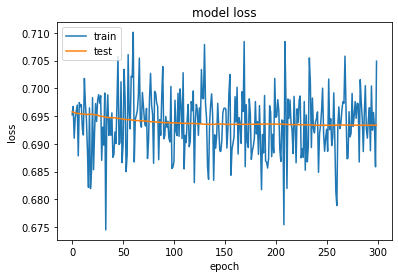

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training3.history.keys())
# summarize training for accuracy
plt.plot(training3.history['accuracy'])
plt.plot(training3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training3.history['loss'])
plt.plot(training3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()